In [46]:
import numpy as np
import pandas as pd
import matplotlib.pylab as plt 

In [47]:
from sklearn.datasets import load_diabetes
data=load_diabetes()

In [48]:
print(data.DESCR)

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

:Number of Instances: 442

:Number of Attributes: First 10 columns are numeric predictive values

:Target: Column 11 is a quantitative measure of disease progression one year after baseline

:Attribute Information:
    - age     age in years
    - sex
    - bmi     body mass index
    - bp      average blood pressure
    - s1      tc, total serum cholesterol
    - s2      ldl, low-density lipoproteins
    - s3      hdl, high-density lipoproteins
    - s4      tch, total cholesterol / HDL
    - s5      ltg, possibly log of serum triglycerides level
    - s6      glu, blood sugar level

Note: Each of these 10 feature variables have bee

In [49]:
X=data.data
y=data.target

In [50]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=45)

In [51]:
X_test

array([[ 3.08108295e-02, -4.46416365e-02,  4.01399650e-02,
         7.69580011e-02,  1.76943802e-02,  3.78296803e-02,
        -2.86742944e-02,  3.43088589e-02, -1.49594876e-03,
         1.19043403e-01],
       [ 1.10726675e-01,  5.06801187e-02, -3.31512560e-02,
        -2.28846772e-02, -4.32086554e-03,  2.02933664e-02,
        -6.18090347e-02,  7.12099798e-02,  1.55684593e-02,
         4.44854786e-02],
       [-5.27375548e-02, -4.46416365e-02, -6.22521820e-02,
        -2.63275281e-02, -5.69681839e-03, -5.07165897e-03,
         3.02319104e-02, -3.94933829e-02, -3.07479175e-02,
        -7.14935151e-02],
       [ 1.26481373e-02, -4.46416365e-02, -2.02175111e-02,
        -1.59989752e-02,  1.21905688e-02,  2.12328118e-02,
        -7.65355859e-02,  1.08111101e-01,  5.98794036e-02,
        -2.17882321e-02],
       [ 1.99132142e-02, -4.46416365e-02, -3.42290681e-02,
         5.51647545e-02,  6.72286831e-02,  7.41549019e-02,
        -6.58446761e-03,  3.28328140e-02,  2.47296400e-02,
         6.

In [52]:
from sklearn.linear_model import LinearRegression
L=LinearRegression()

In [53]:
L.fit(X_train,y_train)

LinearRegression()

In [54]:
print(L.intercept_)
print(L.coef_)

152.13623331746496
[  23.45465406 -247.42747406  492.1087518   329.35876431 -970.79723039
  573.54295519  182.42162368  255.92168168  794.21609282   89.32249214]


In [55]:
y_pred=L.predict(X_test)

In [56]:
from sklearn.metrics import r2_score,mean_squared_error
print('R2 Score:- ',r2_score(y_test,y_pred))
print('MSE:- ',mean_squared_error(y_test,y_pred))
print('RMSE:- ',np.sqrt(mean_squared_error(y_test,y_pred)))

R2 Score:-  0.5188113124539249
MSE:-  2374.3339396183187
RMSE:-  48.72713760953252


In [57]:
from sklearn.linear_model import Ridge
R=Ridge(alpha=100000)

In [58]:
R.fit(X_train,y_train)

Ridge(alpha=100000)

In [59]:
print(R.intercept_)
print(R.coef_)

151.83287930791352
[ 0.00260126  0.00057066  0.00776597  0.0060976   0.00233864  0.00184724
 -0.00513942  0.0052716   0.00734598  0.00528629]


In [60]:
y_pred1=R.predict(X_test)

In [61]:
print('R2 Score:- ',r2_score(y_test,y_pred1))
print('MSE:- ',mean_squared_error(y_test,y_pred1))
print('RMSE:- ',np.sqrt(mean_squared_error(y_test,y_pred1)))

R2 Score:-  -0.00042490200441935855
MSE:-  4936.406154895272
RMSE:-  70.25956272917782


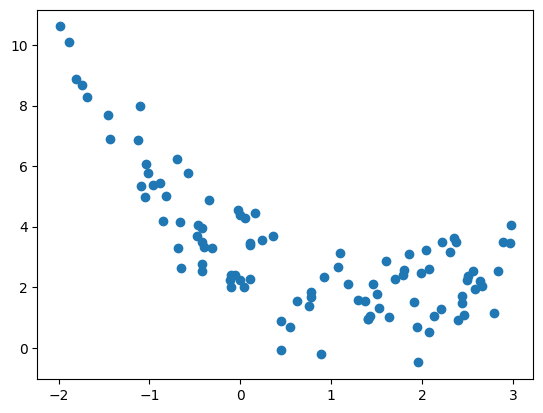

In [62]:
m = 100
x1 = 5 * np.random.rand(m, 1) - 2
x2 = 0.7 * x1 ** 2 - 2 * x1 + 3 + np.random.randn(m, 1)

plt.scatter(x1, x2)
plt.show()

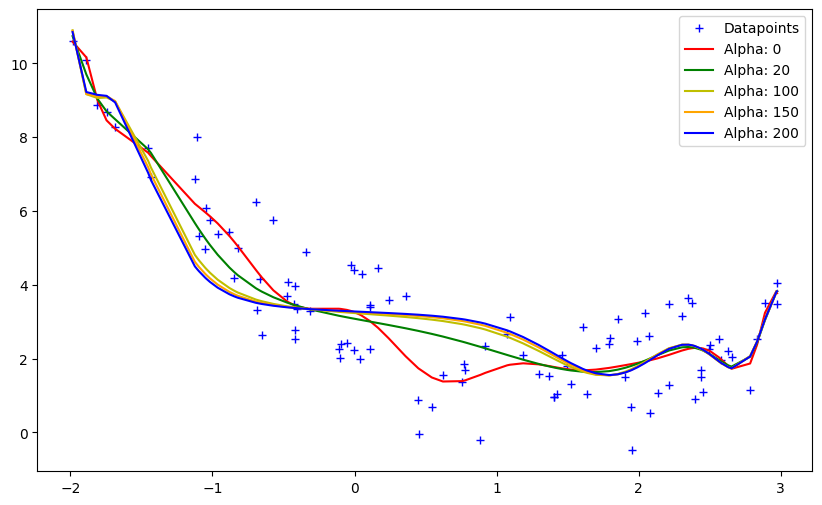

In [63]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures

def get_preds_ridge(x1, x2, alpha):
    model = Pipeline([
        ('poly_feats', PolynomialFeatures(degree=16)),
        ('ridge', Ridge(alpha=alpha))
    ])
    model.fit(x1, x2)
    return model.predict(x1)

alphas = [0, 20,100,150, 200]
cs = ['r', 'g','y','orange', 'b']

plt.figure(figsize=(10, 6))
plt.plot(x1, x2, 'b+', label='Datapoints')

for alpha, c in zip(alphas, cs):
    preds = get_preds_ridge(x1, x2, alpha)
    # Plot
    plt.plot(sorted(x1[:, 0]), preds[np.argsort(x1[:, 0])], c, label='Alpha: {}'.format(alpha))

plt.legend()
plt.show()

##### Ridge regression from scratch

In [64]:
from sklearn.datasets import make_regression

In [65]:
X,y = make_regression(n_samples=100, n_features=1, n_informative=1, n_targets=1,noise=20,random_state=13)

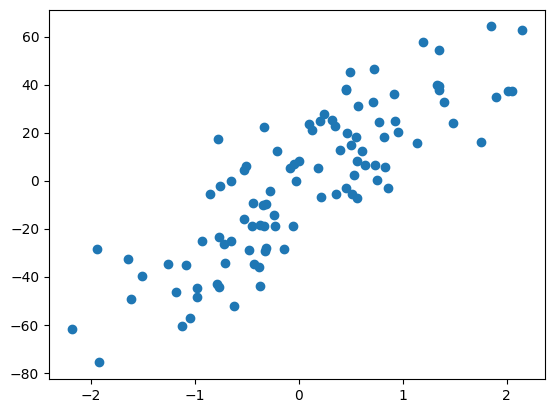

In [66]:
plt.scatter(X,y)

In [67]:
lr=LinearRegression()
lr.fit(X,y)
print(lr.intercept_)
print(lr.coef_)

-2.29474455867698
[27.82809103]


In [68]:
rr=Ridge(alpha=10)
rr.fit(X,y)
print(rr.intercept_)
print(rr.coef_)

-2.126913003523573
[24.9546267]


In [69]:
for i in range(0,201,50):
    rr=Ridge(alpha=i)
    rr.fit(X,y)
    print(i)
    print(rr.intercept_)
    print(rr.coef_)
    print()

0
-2.2947445586769795
[27.82809103]

50
-1.7008737066555062
[17.66035643]

100
-1.4248441496033308
[12.93442104]

150
-1.2653589370619844
[10.20385545]

200
-1.1614734954021684
[8.42522025]



In [73]:
rr1=Ridge(alpha=100)
rr1.fit(X,y)
print(rr1.intercept_)
print(rr1.coef_)

-1.4248441496033308
[12.93442104]


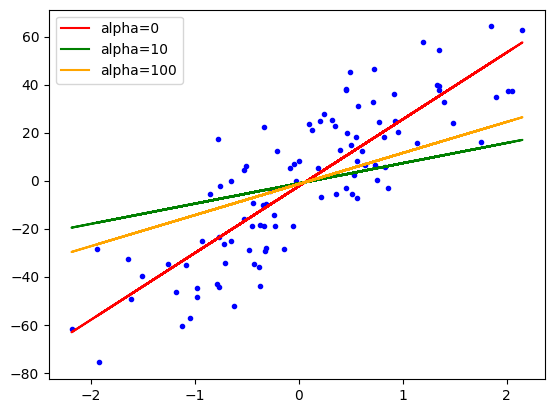

In [74]:
plt.plot(X,y,'b.')
plt.plot(X,lr.predict(X),color='red',label='alpha=0')
plt.plot(X,rr.predict(X),color='green',label='alpha=10')
plt.plot(X,rr1.predict(X),color='orange',label='alpha=100')
plt.legend()

In [77]:
def linear_regression(X,y,alpha=1):
    x_mean = X.mean()
    y_mean = y.mean()
    
    num = 0
    den = 0
    
    for i in range(X.shape[0]):
        num = num + (y[i] - y_mean) * (X[i] - x_mean)
        den = den + (X[i] - x_mean) * (X[i] - x_mean)
        
    m = num/(den + alpha)
    b = y_mean - m*x_mean
        
    return m,b

In [78]:
class MeraRidge:
    
    def __init__(self,alpha=0.1):
        self.alpha = alpha
        self.m = None
        self.b = None
        
    def fit(self,X_train,y_train):
        
        num = 0
        den = 0
        
        for i in range(X_train.shape[0]):
            num = num + (y_train[i] - y_train.mean())*(X_train[i] - X_train.mean())
            den = den + (X_train[i] - X_train.mean())*(X_train[i] - X_train.mean())
        
        self.m = num/(den + self.alpha)
        self.b = y_train.mean() - (self.m*X_train.mean())
        print(self.m,self.b)
    
    def predict(X_test):
        pass

In [79]:
reg=MeraRidge(alpha=100)

In [80]:
reg.fit(X,y)

[12.93442104] [-1.42484415]


##### Ridge Regression with Gradient Descent

In [81]:
X,y=load_diabetes(return_X_y=True)

In [83]:
y

array([151.,  75., 141., 206., 135.,  97., 138.,  63., 110., 310., 101.,
        69., 179., 185., 118., 171., 166., 144.,  97., 168.,  68.,  49.,
        68., 245., 184., 202., 137.,  85., 131., 283., 129.,  59., 341.,
        87.,  65., 102., 265., 276., 252.,  90., 100.,  55.,  61.,  92.,
       259.,  53., 190., 142.,  75., 142., 155., 225.,  59., 104., 182.,
       128.,  52.,  37., 170., 170.,  61., 144.,  52., 128.,  71., 163.,
       150.,  97., 160., 178.,  48., 270., 202., 111.,  85.,  42., 170.,
       200., 252., 113., 143.,  51.,  52., 210.,  65., 141.,  55., 134.,
        42., 111.,  98., 164.,  48.,  96.,  90., 162., 150., 279.,  92.,
        83., 128., 102., 302., 198.,  95.,  53., 134., 144., 232.,  81.,
       104.,  59., 246., 297., 258., 229., 275., 281., 179., 200., 200.,
       173., 180.,  84., 121., 161.,  99., 109., 115., 268., 274., 158.,
       107.,  83., 103., 272.,  85., 280., 336., 281., 118., 317., 235.,
        60., 174., 259., 178., 128.,  96., 126., 28

In [84]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=4)

In [87]:
X_train

array([[ 0.0090156 , -0.04464164,  0.05522933, ...,  0.02323852,
         0.05568623,  0.10661708],
       [ 0.03081083,  0.05068012, -0.03422907, ...,  0.05755657,
         0.0354587 ,  0.08590655],
       [ 0.01628068, -0.04464164, -0.06332999, ..., -0.03949338,
        -0.05947118, -0.06735141],
       ...,
       [ 0.04170844,  0.05068012, -0.01590626, ..., -0.01107952,
        -0.04688253,  0.01549073],
       [ 0.01628068,  0.05068012,  0.00996123, ..., -0.03949338,
         0.01703607,  0.00720652],
       [ 0.04897352,  0.05068012,  0.08109682, ...,  0.07120998,
         0.03243232,  0.04862759]])

In [88]:
from sklearn.linear_model import SGDRegressor

In [89]:
reg=SGDRegressor(penalty='l2',max_iter=500,eta0=0.1,learning_rate='constant',alpha=0.001)

In [90]:
reg.fit(X_train,y_train)

SGDRegressor(alpha=0.001, eta0=0.1, learning_rate='constant', max_iter=500)

In [94]:
y_pred=reg.predict(X_test)
print('R2 Score:- ',r2_score(y_test,y_pred))
print(reg.coef_)
print(reg.intercept_)

R2 Score:-  0.4399212672315417
[  49.78294522 -159.89461636  376.94927603  272.71512968  -10.91368529
  -62.65788231 -167.34100395  136.34465306  338.40586586   90.95401438]
[167.60584593]


In [95]:
reg=Ridge(alpha=0.001,max_iter=500,solver='sparse_cg')

In [96]:
reg.fit(X_train,y_train)

y_pred = reg.predict(X_test)
print("R2 score",r2_score(y_test,y_pred))
print(reg.coef_)
print(reg.intercept_)

R2 score 0.46250101621576734
[  34.52193655 -290.84083104  482.40182913  368.06788094 -852.44871472
  501.59162034  180.11114301  270.7633618   759.73536409   37.49137054]
151.10198521305708


In [97]:
class MeraRidgeGD:
    
    def __init__(self,epochs,learning_rate,alpha):        
        self.learning_rate = learning_rate
        self.epochs = epochs
        self.alpha = alpha
        self.coef_ = None
        self.intercept_ = None
        
    def fit(self,X_train,y_train):        
        self.coef_ = np.ones(X_train.shape[1])
        self.intercept_ = 0
        thetha = np.insert(self.coef_,0,self.intercept_)
        
        X_train = np.insert(X_train,0,1,axis=1)
        
        for i in range(self.epochs):
            thetha_der = np.dot(X_train.T,X_train).dot(thetha) - np.dot(X_train.T,y_train) + self.alpha*thetha
            thetha = thetha - self.learning_rate*thetha_der
        
        self.coef_ = thetha[1:]
        self.intercept_ = thetha[0]
    
    def predict(self,X_test):
        
        return np.dot(X_test,self.coef_) + self.intercept_

In [98]:
reg = MeraRidgeGD(epochs=500,alpha=0.001,learning_rate=0.005)

In [99]:
reg.fit(X_train,y_train)

y_pred = reg.predict(X_test)
print("R2 score",r2_score(y_test,y_pred))
print(reg.coef_)
print(reg.intercept_)

R2 score 0.4738018280260914
[  46.65050914 -221.3750037   452.12080647  325.54248128  -29.09464178
  -96.47517735 -190.90017011  146.32900372  400.80267299   95.09048094]
150.86975316713472
